In [2]:
import numpy as np

# False Training Set

In [ ]:
"""
500k for False

In [3]:
true_bkgs = np.load("./TrainingData/TrueSet/Final_True_Bkg_parts/final_concatenated_true_bkgs_507k.npy")

## Select only images without asteroid/point sources using past CNN model

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('../2025Work/data/models/model_v4/checkpoints/checkpoint.hdf5')

full_test = true_bkgs

proc_hardware_choice = 0

# ----------------------------------------

if proc_hardware_choice == 0:
    proc_hardware_name = '/gpu:0'
    # os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    
elif proc_hardware_choice == 1:
    proc_hardware_name = '/gpu:1'
    os.environ['CUDA_VISIBLE_DEVICES'] = '1'
    
    proc_hardware_name = '/cpu:0'
    os.environ['CUDA_VISIBLE_DEVICES'] = ''
else:
    print('ERROR: You didnt make a proper choice. Defaulting to CPU processing.')
    proc_hardware_name = '/cpu:0'
    
print('Using hardware name =', proc_hardware_name)

with tf.device(proc_hardware_name):
    
    test_set_predictions = model.predict(full_test).flatten()
    
    test_set_predictions_rounded = np.int8(test_set_predictions > 0.5)

neg = [full_test[i] for i in range(len(full_test)) if test_set_predictions_rounded[i]==0]
print(len(neg))

2025-06-17 13:39:17.444656: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-17 13:39:18.105510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-06-17 13:39:19.603854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3888 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
2025-06-17 13:39:19.604482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 3776 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5


Using hardware name = /gpu:0


2025-06-17 13:39:20.714175: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 456531300 exceeds 10% of free system memory.
2025-06-17 13:39:21.110492: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 456531300 exceeds 10% of free system memory.
2025-06-17 13:39:21.633876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2025-06-17 13:39:21.895034: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


15852/15852 [==============================] - 36s 2ms/step
452732


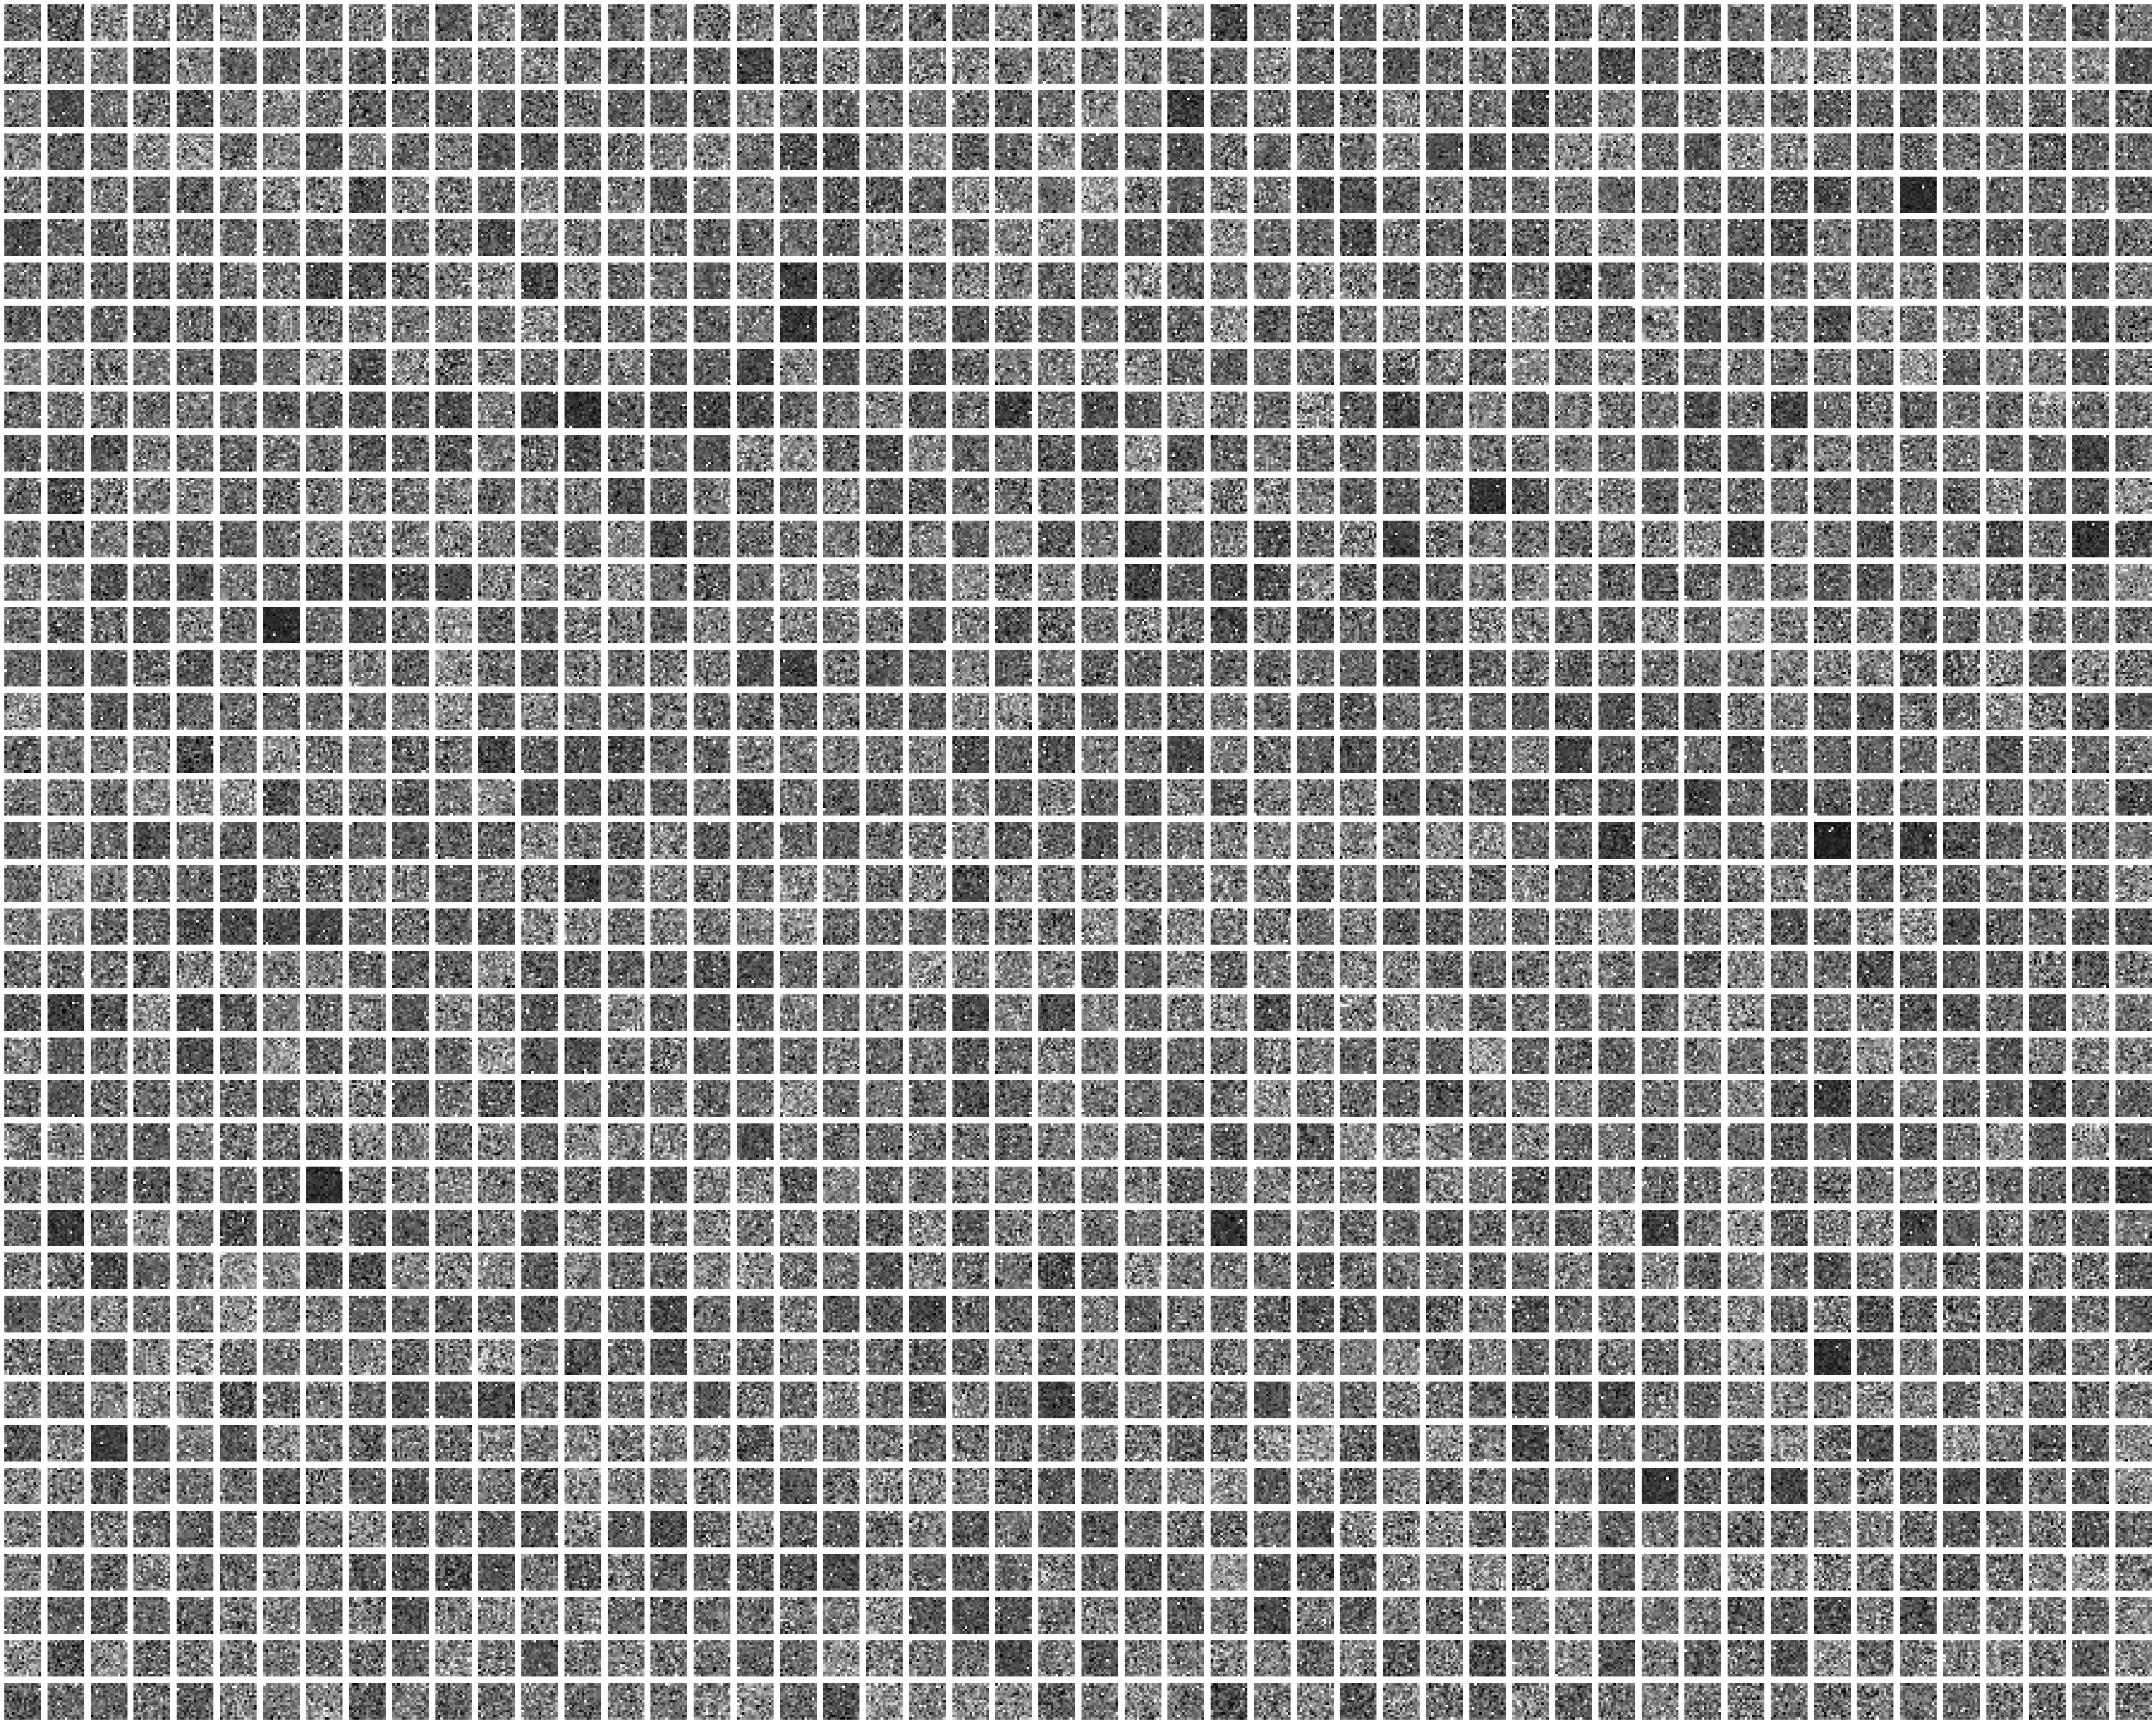

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_in_grid(image_arrays, images_per_row=50):
    # Number of images
    total_images = len(image_arrays)

    num_rows = (total_images + images_per_row - 1) // images_per_row  # This ensures rounding up

    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row, num_rows), dpi=80)

    axes = axes.flatten()

    for idx, img_array in enumerate(image_arrays):
        try:
            if img_array.max() > 1:
                img_array = img_array / img_array.max()

            axes[idx].imshow(img_array, cmap='gray')  # Display in grayscale if single-channel
        except Exception as e:
            print(f"Could not process image {idx}: {e}")
            axes[idx].axis('off')  # In case of any errors, hide the axis
        
        axes[idx].axis('off')  # Turn off axis for each image

    # Hide any unused axes (in case the number of images is less than a full grid)
    for idx in range(total_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()  # Adjust layout to fit the images nicely
    plt.show()
    
plot_images_in_grid(neg[270000:272000])

In [6]:
# np.save("./TrainingData/FalseSet/280k_blank_false_images.npy", neg[0:280000])
np.save("./TrainingData/TrueSet/Final_TrueBkgs_470k_ReadyforSynthImplant.npy", neg)

In [7]:
m = [np.std(i) for i in true_bkgs if np.std(i) == 0.0]
print(len(m))

0
